In [1]:
import pandas as pd

In [2]:
Casualties = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

In [11]:
Casualties.rename(columns = {'date_of_event': 'date_event',
                             'took_part_in_the_hostilities': 'hostile',
                             'event_location': 'loc',
                             'event_location_district': 'loc_district',
                             'event_location_region': 'loc_region'}, inplace = True)

In [12]:
pd.set_option('display.max_columns', None)
Casualties.head(0)

,name,date_event,age,citizenship,loc,loc_district,loc_region,date_of_death,gender,hostile,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes


In [5]:
Casualties['date_event'] = pd.to_datetime(Casualties['date_event'])

In [6]:
Casualty_ratio = Casualties[(Casualties['citizenship'] == 'Palestinian') | (Casualties['citizenship'] == 'Israeli')]['citizenship'].value_counts()
Casualty_ratio

citizenship
Palestinian    10092
Israeli         1029
Name: count, dtype: int64

<Axes: title={'center': 'Casualty ratio'}, ylabel='count'>

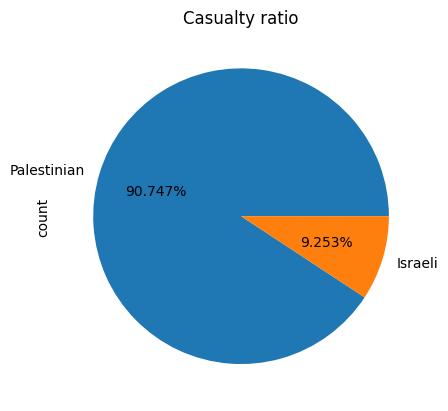

In [7]:
Casualty_ratio.plot(kind = 'pie', title = 'Casualty ratio', autopct = '%.3f%%')

In [61]:
Casualties['hostile'].count()

9694

<Axes: title={'center': 'Deaths: Hostile vs. Non-hostile vs. Unknown '}, ylabel='count'>

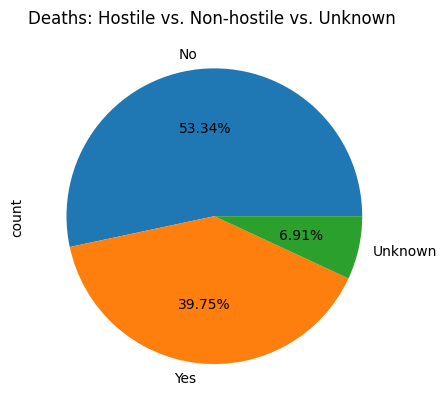

In [55]:
Casualties[(Casualties['hostile'] ==  'No') | (Casualties['hostile'] == 'Yes') | (Casualties['hostile'] == 'Unknown') | (Casualties['hostile'] == '')]['hostile'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Deaths: Hostile vs. Non-hostile vs. Unknown ')

In [53]:
Casualties[(Casualties['hostile'] == 'Yes') | (Casualties['citizenship'] == 'Iraeli')]

name                           3467
date_event                     3467
age                            3442
citizenship                    3467
loc                            3467
loc_district                   3467
loc_region                     3467
date_of_death                  3467
gender                         3463
hostile                        3467
place_of_residence             3447
place_of_residence_district    3447
type_of_injury                 3335
ammunition                     1548
killed_by                      3467
notes                          3389
dtype: int64

In [49]:
Casualties['citizenship'].value_counts()

citizenship
Palestinian    10092
Israeli         1029
Jordanian          2
American           1
Name: count, dtype: int64

In [31]:
Casualties.loc[11123]

name                               Wichlav Zalsevsky
date_event                       2000-10-02 00:00:00
age                                             24.0
citizenship                                  Israeli
loc                                            Masha
loc_district                                  Salfit
loc_region                                 West Bank
date_of_death                             2000-10-02
gender                                             M
hostile                                     Israelis
place_of_residence                            Ashdod
place_of_residence_district                   Israel
type_of_injury                               gunfire
ammunition                           live ammunition
killed_by                      Palestinian civilians
notes                                            NaN
Name: 11123, dtype: object